# Analysis for Continuous Improvement

Author Name: Jeff Zhuo

9-digit PID: 730480180

Continuous Improvement embraces a belief there is _always room to make things better_. It is a mindset and process we value and practice in this course. In this assignment, you are able to practice continuous improvement and contribute to the design ideas of the course.

## Brainstorming Ideas

Reflect on your personal experiences and observations in COMP110 and **brainstorm modifications to the course that _create value_ beyond its current design**. When brainstorming, try not to be critical of the ideas you come up with regarding scale, stakeholders impacted, or for any other reasons. In the markdown cell below, brainstorm 3 to 5 ideas you think would create value for you.

Each brainstormed idea should state a. the suggested change or addition, b. what the expected value created, and c. which specific stakeholders would benefit.  If helpful, expand on the following template **"The course should (state idea here) because it will (state value created here) for (insert stakeholders here)."**

Example A: "The course should use only examples from psychology experiments because it will be more relevant for students who are psychology majors."

Example B: "The course should not have post-lesson questions because they are not useful for most students in the class."

### Part 1. Creative Ideation

1. This course should *include text documents of contents taught* because it will *allow faster learning process* for *students with prior experience*. 
2. This course should *include a lab/recitation session* because it will *allow more course practice* for *students without prior experience*.
3. This course should *be taught with one large project that builds on each other, instead of individual exercises* for *students enrolled*.
4. This course should *have tutorials to walk through larger projects* because it will *allows higher level of comfort* for *students without prior experience*.
5. This course should *have one professional project* because it will *give a boost on resume* for *enrolled students*. Students could walk away from this class feeling accomplished beyond the course credits. 

## Connecting with Available Data

The data you have available for this analysis is limited to the anonymized course survey you and your peers filled out a few weeks ago. The data is found in the `survey.csv` file in this exercise directory. Each row represents an individual survey response. Each column has a description which can be found on the project write-up here: <https://22s.comp110.com/exercises/ex08.html>

Review the list of available data and identify which one of your ideas _does not_, or is _least likely to_, have relevant data to support the analysis of your idea to create value. In the box below, identify which of your ideas lacks data and suggest how we might be able to collect this data in the future. One aspect of _continuous improvement_ is trying to avoid "tunnel vision" where possible improvements are not considered because there is no data available to analyze it. Identifying new data sources can unlock improvements!

### Part 2. Identifying Missing Data

**1. Idea without sufficient data to analyze:**

This course should *include text documents of contents taught* because it will *allow faster learning process* for *students with prior experience*. 

**2. Suggestion for how to collect data to support this idea in the future:**

Text-based teaching makes the content harder to absorb. However, they stick around longer if students could learn from the text. A survey would be insufficient to collect this type of data. For data of this nature, an experiment would be needed and collect experiment data. 

## Choosing an Idea to Analyze

Consider those of your ideas which _do_ seem likely to have relevant data to analyze. If none of your ideas do, spend a few minutes and brainstorm another idea or two with the added connection of data available on hand and add those ideas to your brainstormed ideas list.

Select the one idea which you believe is _most valuable_ to analyze relative to the others and has data to support the analysis of. In the markdown cell for Part 3 below, identify the idea you are exploring and articulate why you believe it is most valuable (e.g. widest impact, biggest opportunity for improvement, simplest change for significant improvement, and so on).

### Part 3. Choosing Your Analysis

**1. Idea to analyze with available data:** 

This course should *include a lab/recitation session* because it will *allow for more guided course practice* for *students without prior experience*.

**2. This idea is more valuable than the others brainstormed because:**

COMP 110 would become a 4 hour course, and it truly reflects the amount of time and effort needed for this class. It is also the simplest change, from a student's perspective, for the largest improvement for students without prior experience. 

## Your Analysis

Before you begin analysis, a reminder that we do not expect the data to support everyone's ideas and you can complete this exercise for full credit even if the data does not clearly support your suggestion or even completely refutes it. What we are looking for is a logical attempt to explore the data using the techniques you have learned up until now in a way that _either_ supports, refutes, or does not have a clear result and then to reflect on your findings after the analysis.

Using the utility functions you created for the previous exercise, you will continue with your analysis in the following part. Before you begin, refer to the rubric on the technical expectations of this section in the exercise write-up.

In this section, you are expected to interleave code and markdown cells such that for each step of your analysis you are starting with an English description of what you are planning to do next in a markdown cell, followed by a Python cell that performs that step of the analysis.

### Part 4. Analysis

We begin by changing some settings in the notebook to automatically reload changes to imported files.

In [1]:
%reload_ext autoreload
%autoreload 2

We continue by importing the helper functions from `data_utils`.

In [2]:
from data_utils import * 

Next, we would preprocess the CSV data before starting the analysis.

In [3]:
SURVEY_DATA_CSV_FILE_PATH: str = "../../data/survey.csv"

row_table: list[dict[str, str]] = read_csv_rows(SURVEY_DATA_CSV_FILE_PATH)
# convert to column table so we can work with it more efficiently
data_table: dict[str, list[str]] = columnar(row_table)

#### Sample size of people who have no experience of coding before COMP 110

This proposal is targeted towards students who have no prior coding experience. Therefore, we should first find if they take up significant portion of COMP 110 class. A larger "None to less than one month!" sample meant that the proposal would have a larger effect. 

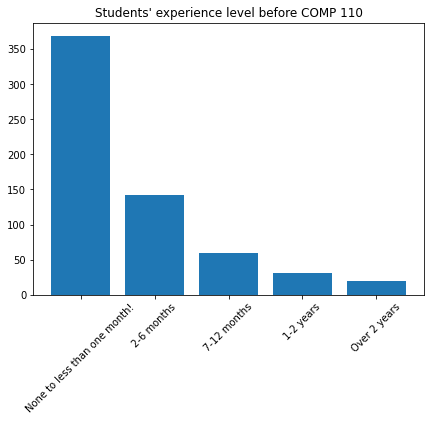

In [4]:
import matplotlib.pyplot as plt

# filter data
exp_and_understanding_table: dict[str, list[str]] = select(data_table, ["prior_exp", "understanding"])
unordered_table: dict[str, int] = count(exp_and_understanding_table["prior_exp"])
previous_experience_data: dict[str, int] = order_data(unordered_table, ["None to less than one month!", "2-6 months", "7-12 months", "1-2 years", "Over 2 years"])

# display data
fig, axes = plt.subplots(facecolor='w')
fig.set_size_inches(7, 5)

axes.set_title("Students' experience level before COMP 110")
axes.bar(previous_experience_data.keys(), previous_experience_data.values())
axes.tick_params(axis='x', labelrotation = 45)

fig.align_labels() 
plt.show()


#### How are no-experience students doing in class?

Next, we would need to know if no-experience students found the class to be hard to understand. If they do, the results would imply that a lab/recitation would be needed to increase understanding. On the other hand, If the data shows high understanding rate, a lab/recitation would just be busy work and a waste of time. 

A `1` indicate that the student is lost; a `7` indicate the student understand everything.

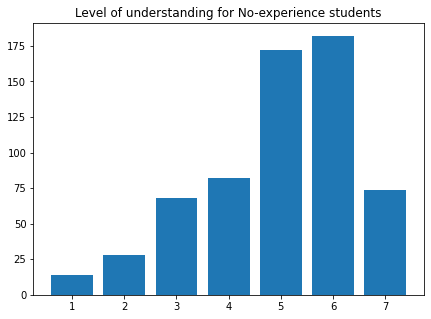

In [5]:
import matplotlib.pyplot as plt

# filter data
filter_interest_type: dict[str, list[str]] = {"prior_exp": ["None to less than one month!"], "understanding": ["1", "2", "3", "4", "5", "6", "7"]}  # this states the type of data I wanted
exp_and_understanding_table = head(exp_and_understanding_table, 1000)
no_exp_students: dict[str, list[str]] = filter_data(exp_and_understanding_table, filter_interest_type)

unordered_no_exp_student_understanding_table: dict[str, int] = count(no_exp_students["understanding"])  # find the frequency of understand level
# the resulting table is the distribution of understanding level for no coding experience students
ordered_no_exp_student_understanding: dict[str, int] = order_data(unordered_no_exp_student_understanding_table, ["1", "2", "3", "4", "5", "6", "7"])

# display data
fig, axes = plt.subplots(facecolor='w')
fig.set_size_inches(7, 5)

axes.set_title("Level of understanding for No-experience students")
axes.bar(ordered_no_exp_student_understanding.keys(), ordered_no_exp_student_understanding.values())
# axes.tick_params(axis='x', labelrotation = 45)

fig.align_labels() 
plt.show()

## Conclusion

In the following markdown cell, write a reflective conclusion given the analysis you performed and identify recommendations.

If your analysis of the data supports your idea, state your recommendation for the change and summarize the data analysys results you found which support it. Additionally, describe any extensions or refinements to this idea which might be explored further. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change.

If your analysis of the data is inconclusive, summarize why your data analysis results were inconclusive in the support of your idea. Additionally, describe what experimental idea implementation or additional data collection might help build more confidence in assessing your idea. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by experimenting with your idea.

Finally, if your analysis of the data does not support it, summarize your data analysis results and why it refutes your idea. Discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change. If you disagree with the validity of the findings, describe why your idea still makes sense to implement and what alternative data would better support it. If you agree with the validity of the data analysis, describe what alternate ideas or extensions you would explore instead. 

### Part 5. Conclusion

The analyzed data ultimately does not support the proposal that this course should *include a lab/recitation session* because it will *allow for more guided course practice* for *students without prior experience*. Although students with no coding experience (one month or less) make up a large proportion of the class, a majority of them found that the class is fairly easy to understand (5~6). 

The first graphical analysis shows that a great majority of the students in COMP 110 have no coding experience. This supports the effectiveness of lab/recitation because practice makes perfect for new learners. However, the second graphical analysis shows that most students with no coding experience could understand the class at a confidence level of 5 and 6 out of 7. This result refutes the proposal that a lab/recitation session is needed to help students with no coding experience because they already understand the content well. 

Some negative effects of my proposal would be the extra workload for ULAs, TAs, and the whole student body. I disagree with the findings of this analysis. Naturally, students who has less experience should struggle more than students that have coding experience. It would make sense to continue implementing my proposal because the survey is biased. The survey was taking before the harder concepts like OOP and this project. If the survey was taken near the end of the course (future work), I predict that the level of understand would decrease because harder concepts are taught near the end of the semester. 